# PartA

In [73]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve

In [74]:
dfP1 = pd.read_csv("/content/advertising.csv")
dfP1

,Unnamed: 0,Unnamed: 0.1,TV,Radio,Newspaper,Sales
0,0,1,230.1,37.8,69.2,22.1
1,1,2,44.5,39.3,45.1,10.4
2,2,3,17.2,45.9,69.3,9.3
3,3,4,151.5,41.3,58.5,18.5
4,4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...,...
195,195,196,38.2,3.7,13.8,7.6
196,196,197,94.2,4.9,8.1,9.7
197,197,198,177.0,9.3,6.4,12.8
198,198,199,283.6,42.0,66.2,25.5


**1a**

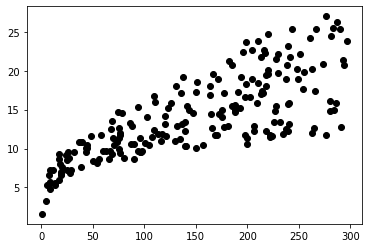

In [75]:
import matplotlib.pyplot as plt
plt.scatter(dfP1['TV'],dfP1['Sales'],color='Black')

**1b**

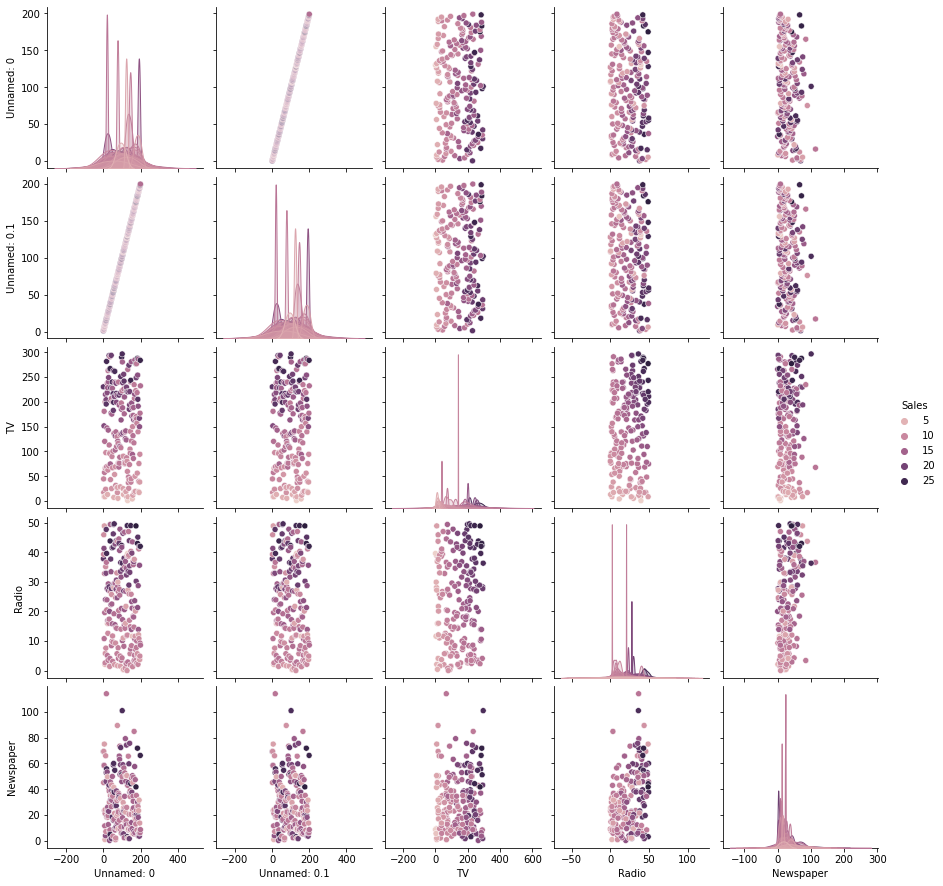

In [76]:
sns.pairplot(dfP1, hue="Sales") 

**1c**

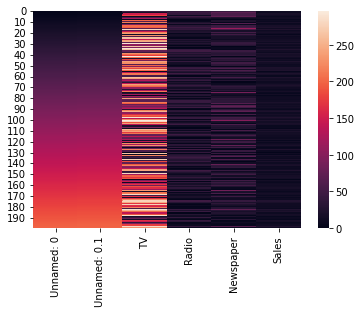

In [77]:
sns.heatmap(data=dfP1)

**2**

In [78]:
# Linear Regression model based on money spent on TV advertisements versus Sales.
x=dfP1[["TV"]]
y=dfP1["Sales"]

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.75)

In [80]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)

In [81]:
m=lr.coef_
c=lr.intercept_
print("Slope",m[0])
print("Intercept",c)

Slope 0.04574181415518287
Intercept 7.2967144420598276


In [82]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 2.4952165638320514
Mean Squared Error: 10.298785554706862
Root Mean Squared Error: 3.2091720980194975


**3**

In [83]:
Y_pred

array([11.67420606, 14.76635269,  7.48425588,  8.15208637,  7.32873371,
        8.73758159, 10.46204798, 10.75022141, 15.89160132, 20.26909294,
       18.15582112, 10.39800944, 12.92753176, 16.40390964, 12.60276488,
       20.69449181, 17.14950121, 18.26560148, 10.78681486, 16.03797513,
       10.96520794, 12.36033327, 14.14426402,  7.89593221, 17.06259176,
       16.15690384,  7.83189367, 15.18717738, 19.81624898, 11.88919258,
       19.32223738, 17.46969391, 13.48100772, 17.35076519,  8.60493033,
        9.03490338, 13.43984008, 11.28540064,  8.55461433, 16.43592891,
       12.7948805 , 18.42112364, 17.3736361 ,  8.193254  , 14.77550106,
       17.46969391, 16.13403294, 10.02292657, 15.39301555, 16.33529692])

**4**

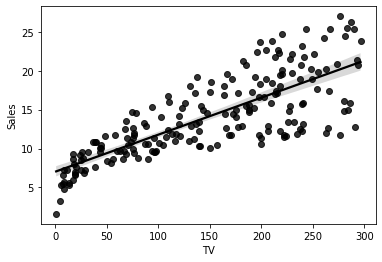

In [84]:
sns.regplot(data=dfP1,x="TV",y="Sales",color='Black')

**5**

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


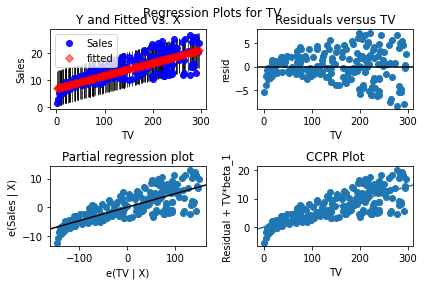

<Figure size 2160x1152 with 0 Axes>

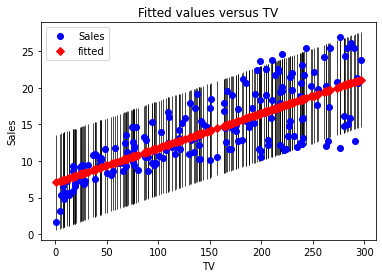

In [85]:
import statsmodels.api as sm
N = sm.add_constant(dfP1[["TV"]])
model = sm.OLS(dfP1["Sales"], N).fit()
sm.graphics.plot_regress_exog(model, "TV")
plt.figure(figsize=(30, 16))
plt.show()
sm.graphics.plot_fit(model, "TV")
plt.show()

# PartB

**1**

In [86]:
dfP2 = pd.read_csv("/content/pima-indians-diabetes.csv")
dfP2

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [87]:
dfP2.describe()

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [88]:
x=dfP2[dfP2.columns.values[:-1]]
y=dfP2[dfP2.columns[-1]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

**2**

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**3a**

In [90]:
#Model and Training
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

**3b**

In [91]:
y_pred =model.fit(x_train, y_train).predict(x_test)
KNN_preds = pd.DataFrame({"Predicted":y_pred})
KNN_preds

,Predicted
0,0
1,1
2,1
3,0
4,0
...,...
149,0
150,0
151,1
152,0


**4**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.82      0.77      0.80       109
           1       0.52      0.60      0.56        45

    accuracy                           0.72       154
   macro avg       0.67      0.69      0.68       154
weighted avg       0.73      0.72      0.73       154



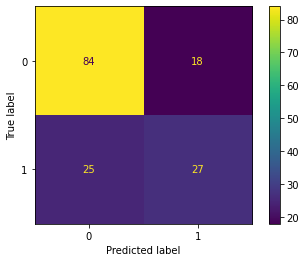

In [92]:
#  Plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,x_test,y_test)
# Classification report
from sklearn.metrics import classification_report
print(classification_report(model.predict(x_test),y_test))

Text(0, 0.5, 'Mean Error')

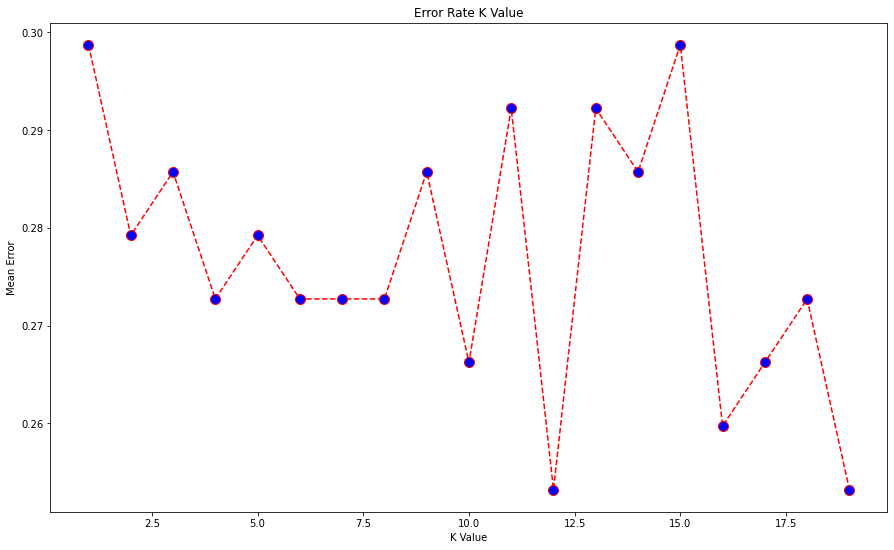

In [93]:
error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(15, 9))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')